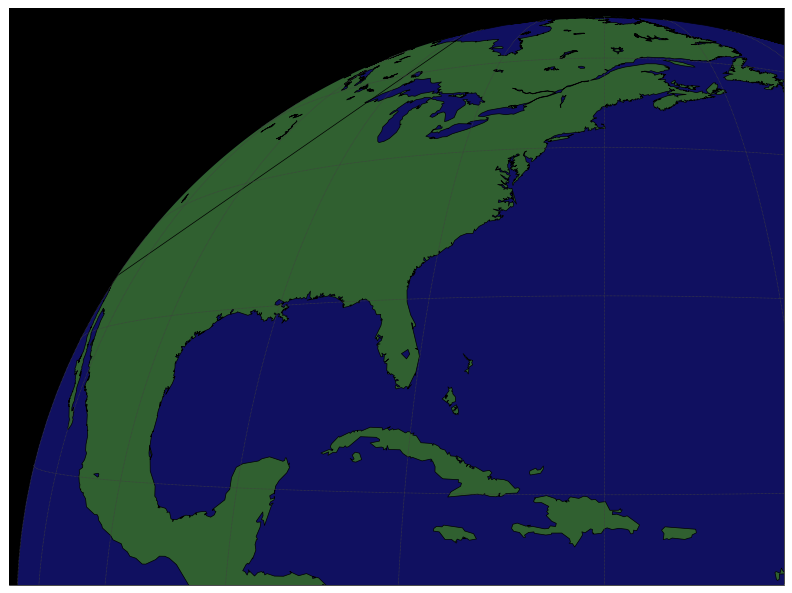

In [51]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,16), dpi=50)

ax.set_facecolor("black")

map = Basemap(resolution='l', 
              satellite_height=3500000.,
              projection='nsper', 
              lat_0 = 15., lon_0 = -70.,
              llcrnrx=-3000000.,llcrnry=100000.,urcrnrx=900000.,urcrnry=3000000.
             )

map.drawmapboundary(fill_color='#101060')
map.fillcontinents(color='#306030',lake_color='#101060')
map.drawcoastlines()
# draw parallels and meridians.
map.drawparallels(np.arange(0,60,10.), color="#404040")
map.drawmeridians(np.arange(-120.,-20.,10), color="#404040")

plt.show()

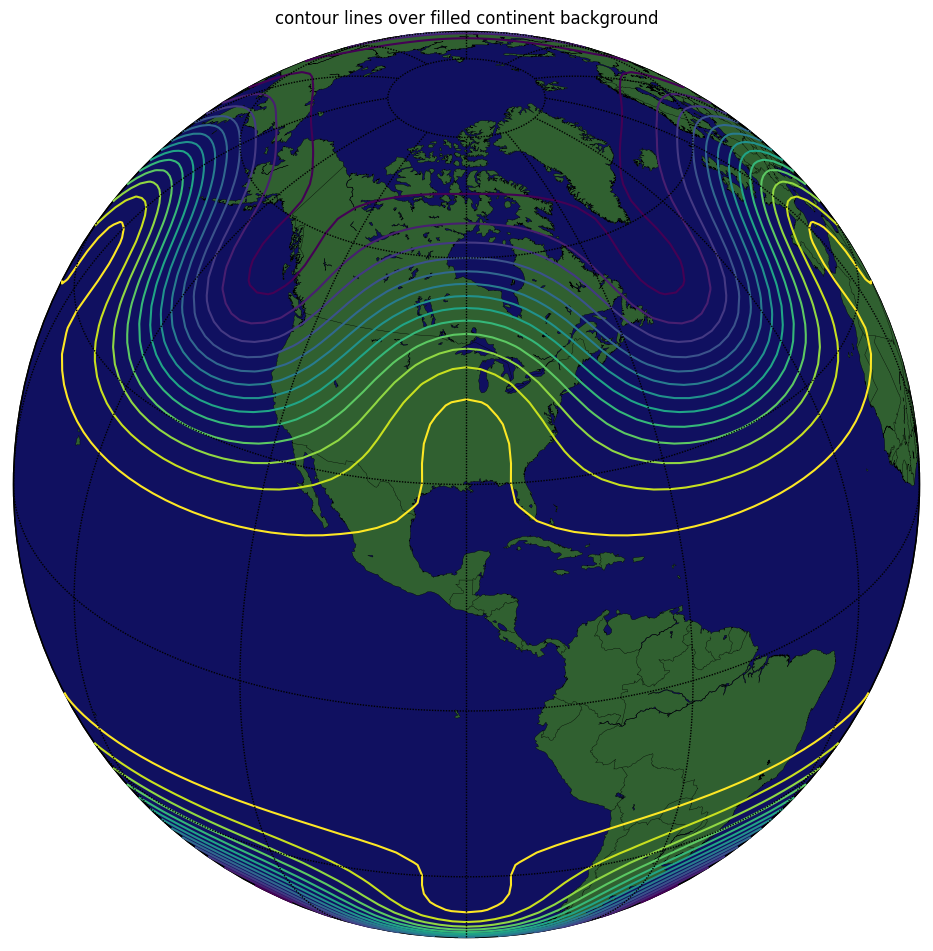

In [59]:
fig, ax = plt.subplots(figsize=(12,12), dpi=100)
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=30,lon_0=-90,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='#306030',lake_color='#101060')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='#101060')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()